In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
data = pd.read_csv("housing.csv")

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [88]:
data.dropna(inplace=True)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<Axes: >

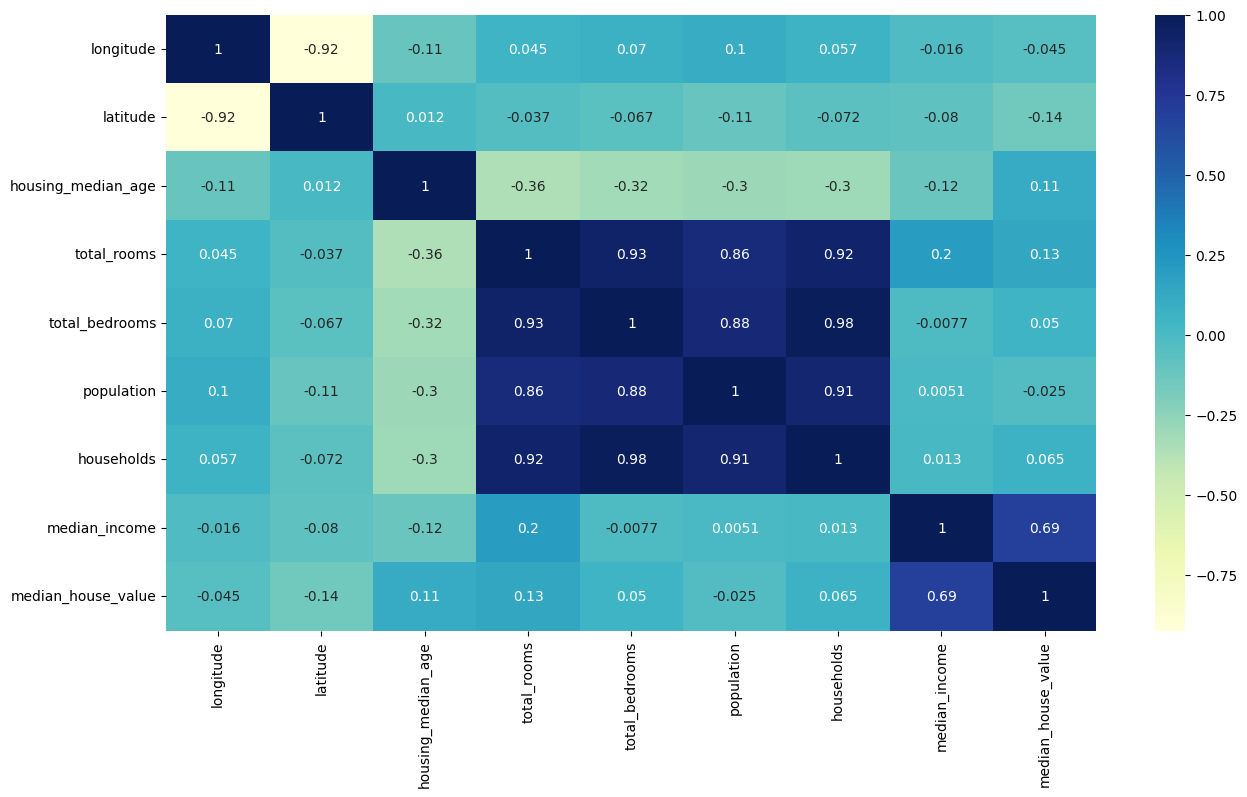

In [90]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

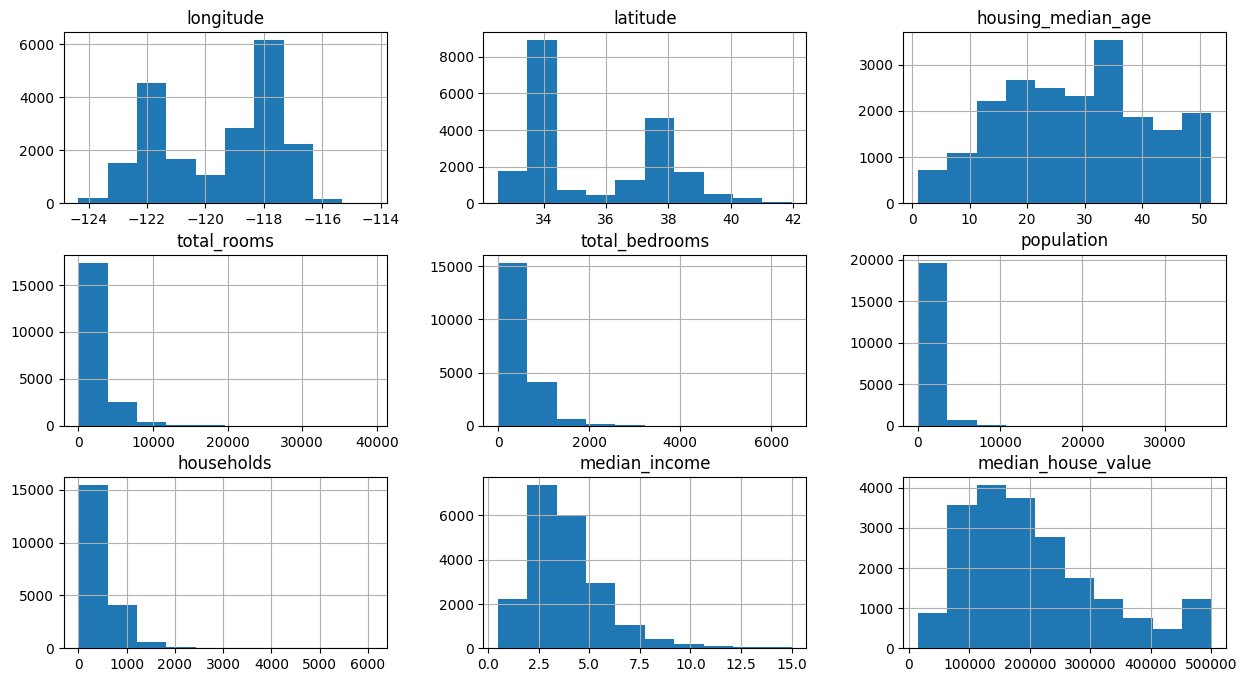

In [91]:
data.hist(figsize=(15,8))

In [92]:
data['total_rooms']=np.log(data['total_rooms']+1)
data['total_bedrooms']=np.log(data['total_bedrooms']+1)
data['population']=np.log(data['population']+1)
data['households']=np.log(data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

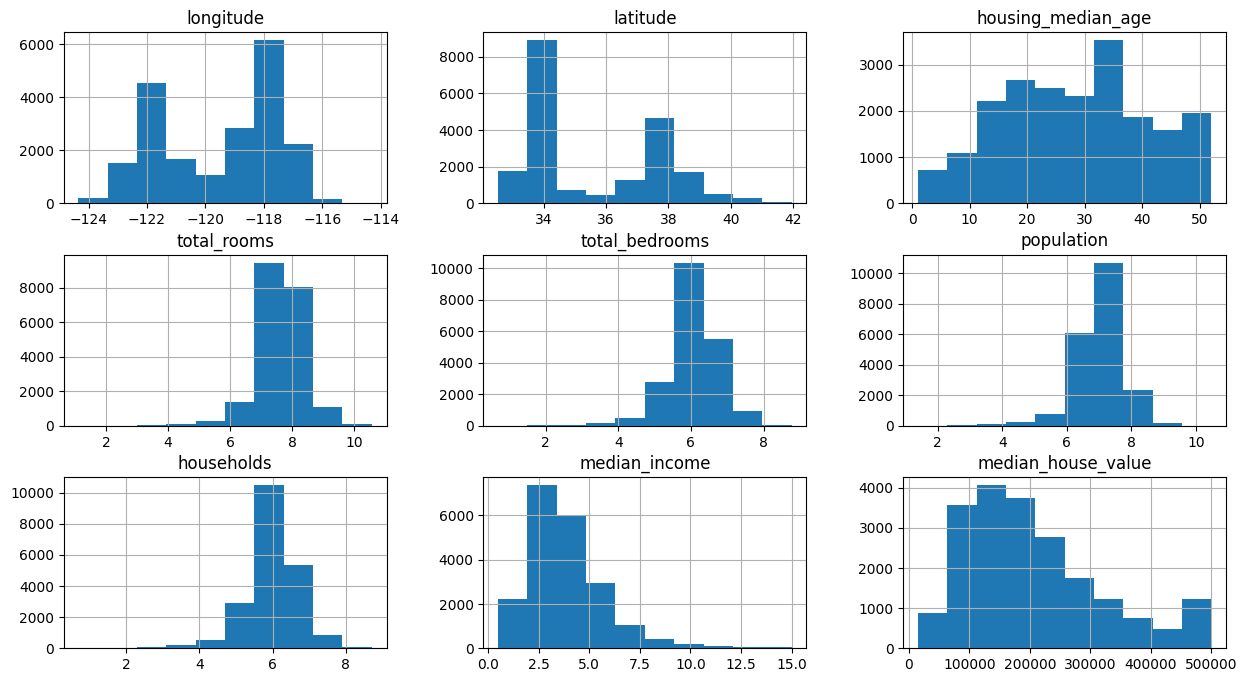

In [93]:
data.hist(figsize=(15,8))

In [94]:
data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [95]:
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [96]:
data = data.drop(["INLAND"],axis=1)

In [97]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,0,0,0


<Axes: >

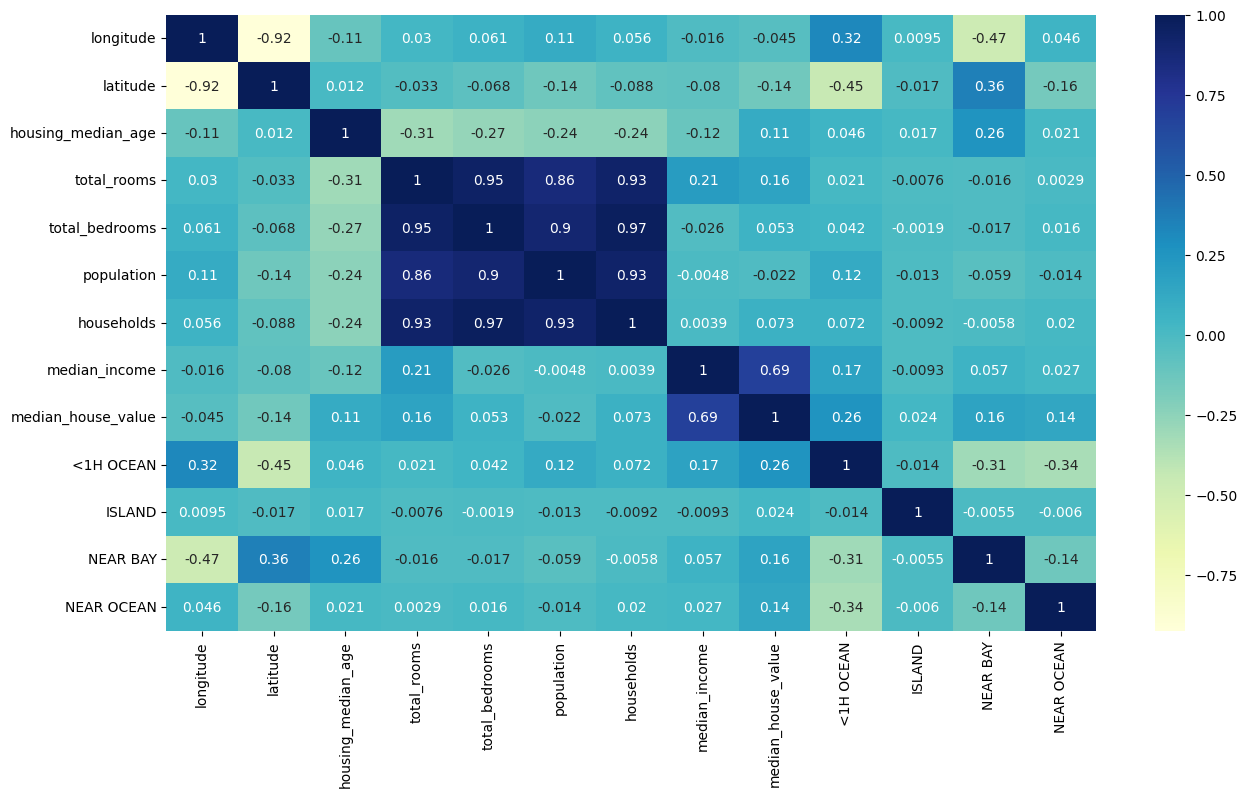

In [98]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

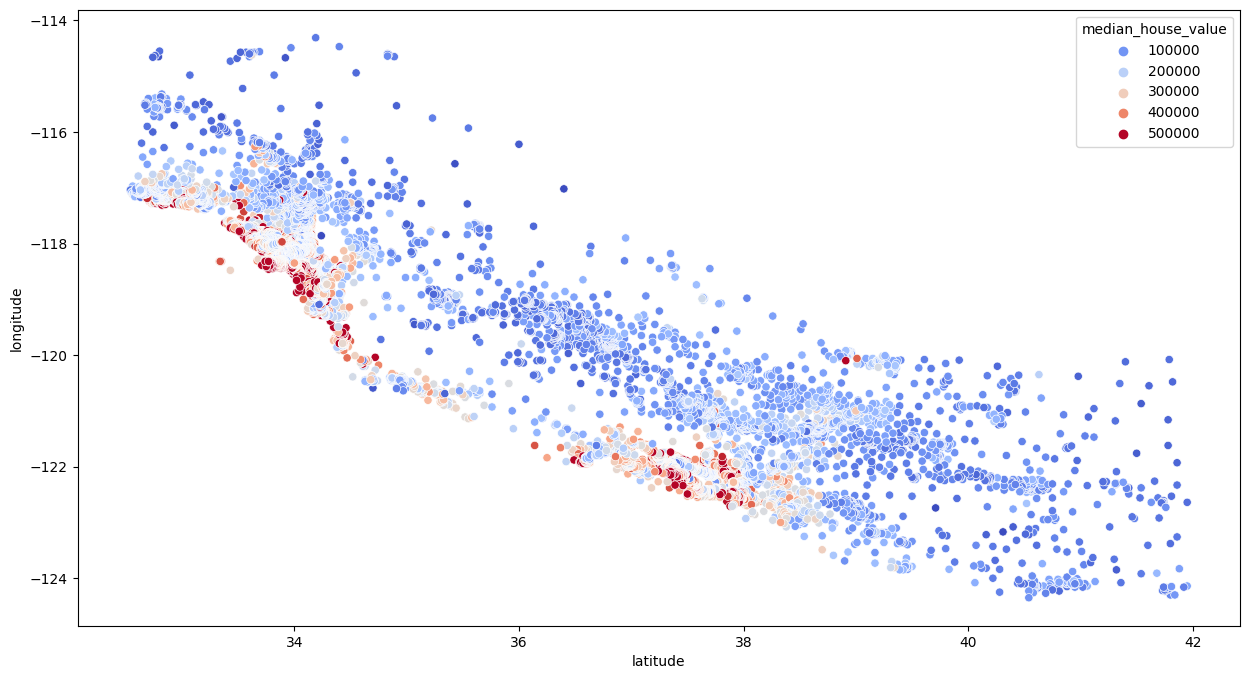

In [99]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data= data,hue="median_house_value",palette="coolwarm")

In [100]:
data['bedromm_ratio']= data['total_bedrooms']/data['total_rooms']
data['household_rooms'] = data['total_rooms']/data['households']

<Axes: >

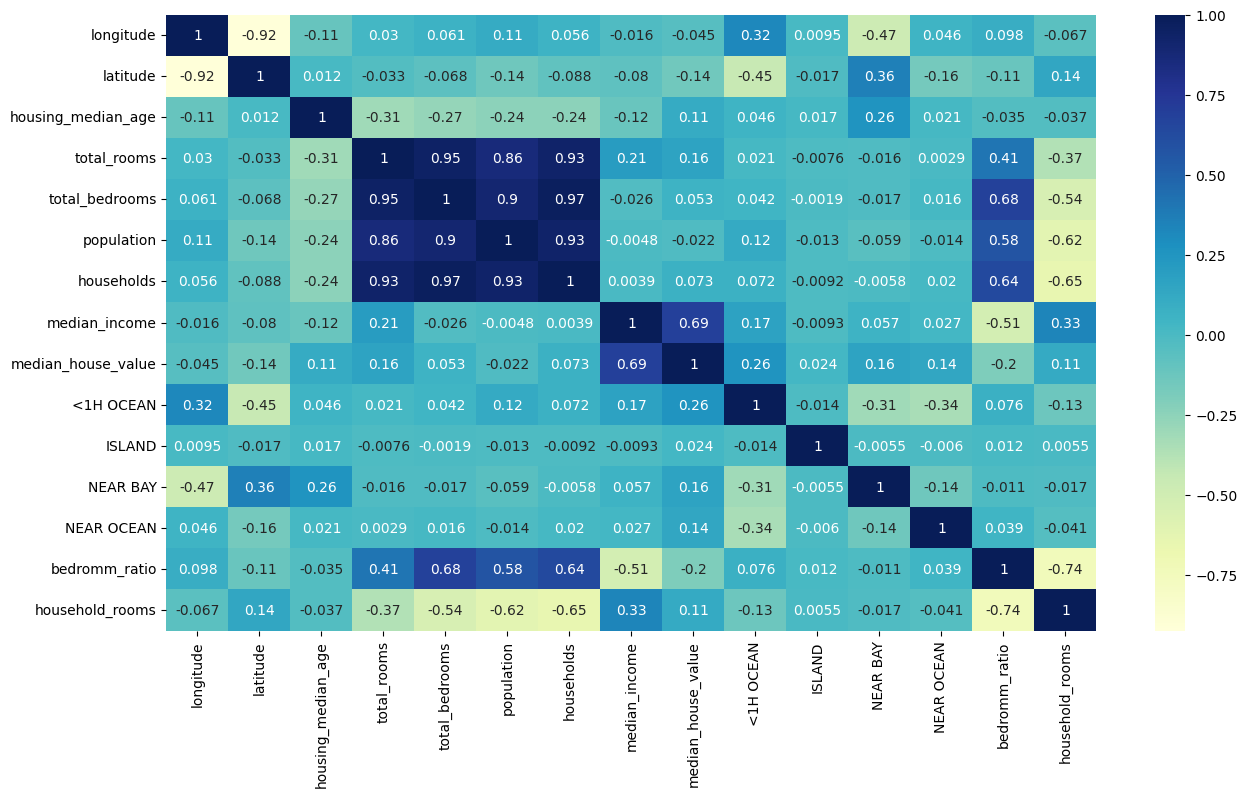

In [101]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [102]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'],axis=1)
y= data['median_house_value']

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [110]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [111]:
reg.score(X_test,y_test)

0.6712723623710954

In [108]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [106]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train,y_train)


RandomForestRegressor()

In [112]:
forest.score(X_test,y_test)

0.8160591137619464

In [109]:
import pickle
with open('model_randForest_pickle','wb') as f:
    pickle.dump(reg,f)